### 필수과제
- 지니, 엔트로피 지수 개념 정리하기
- 위의 예시 코드 외에 새로운 예시를 만들어서 직접 계산해 보기

### 엔트로피
$$ H(X) = -\sum_{i=1}^{n}p_{i}\;log_{2}\;p_{i} $$
- 무질서한 정도를 정량화/수치화한 값
- 불손도를 측정하는 지표, 정보량의 기댓값
- 불손할수록 엔트로피는 큰 값을 갖게 됨

---

### 정보 이득
- Decision Tree에서 모델을 선택하는 기준으로 사용
- 즉, 트리 분할 후 정보 이득(Information Gain)이 많은 쪽을 선택
- 분할 전 총 엔트로피에서 분할 후 엔트로피를 뺀 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def entropy(x):
    return (-x * np.log2(x)).sum()

In [14]:
group_1 = np.array([0.25, 0.25, 0.25, 0.25])
group_2 = np.array([0.5, 0.2, 0.1, 0.2])
group_3 = np.array([0.01, 0.01, 0.01, 0.97])
group_4 = np.array([0.05, 0, 0.05, 0.9])
group_5 = np.array([0.45, 0.05, 0.45, 0.05])
group_6 = np.array([0.1, 0.1, 0.7, 0.1])

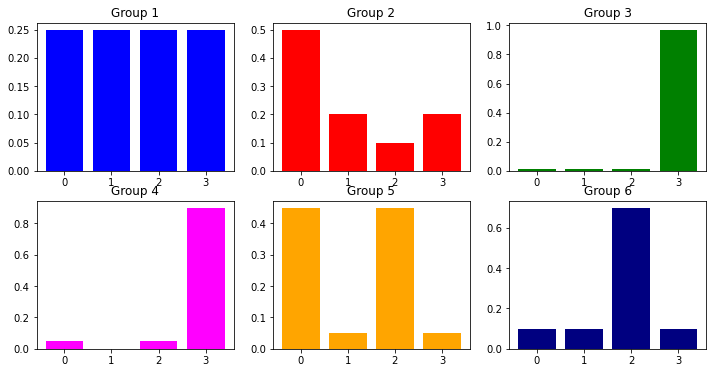

In [15]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
axes[0,0].bar(np.arange(4), group_1, color="blue")
axes[0,0].set_title("Group 1")
axes[0,1].bar(np.arange(4), group_2, color="red")
axes[0,1].set_title("Group 2")
axes[0,2].bar(np.arange(4), group_3, color="green")
axes[0,2].set_title("Group 3")
axes[1,0].bar(np.arange(4), group_4, color="magenta")
axes[1,0].set_title("Group 4")
axes[1,1].bar(np.arange(4), group_5, color="orange")
axes[1,1].set_title("Group 5")
axes[1,2].bar(np.arange(4), group_6, color="navy")
axes[1,2].set_title("Group 6")
plt.show()

In [16]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)
entropy_4 = entropy(group_4)
entropy_5 = entropy(group_5)
entropy_6 = entropy(group_6)

print(f"Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup_3: {entropy_3:.3f}\nGroup 4: {entropy_4:.3f}\nGroup 5: {entropy_5:.3f}\nGroup_6: {entropy_6:.3f}")

Group 1: 2.000
Group 2: 1.761
Group_3: 0.242
Group 4: nan
Group 5: 1.469
Group_6: 1.357


C:\Users\doram\AppData\Local\Temp\ipykernel_23228\2433760103.py:2: RuntimeWarning: divide by zero encountered in log2
  return (-x * np.log2(x)).sum()
C:\Users\doram\AppData\Local\Temp\ipykernel_23228\2433760103.py:2: RuntimeWarning: invalid value encountered in multiply
  return (-x * np.log2(x)).sum()


- 데이터 구성이 균일할수록 엔트로피 값이 작아진다.
- 매우 균일한 그룹의 경우 엔트로피 값이 0에 가깝다.
- 위의 식에서는 특정 항목이 0인 경우 제대로 계산되지 않는 것을 확인할 수 있다 (Group 4).
- 실제로는 log 안의 값이 0이 되어버리지만, 그 값에 0이 곱해지므로 오류 없이 계산할 수 있다.

In [17]:
# Group 4의 엔트로피 값
-0.05 * np.log2(0.05) + 0 + -0.05 * np.log2(0.05) + -0.9 * np.log2(0.9)

0.5689955935892812

### 지니 지수
$$ Gini = 1-\sum_{i=1}^{C}(p_{i})^{2} $$
- 데이터의 산포도를 정량화한 값, 불순도를 측정하는 값
- 지니 지수가 높을수록 엔트로피가 높고 데이터가 분산됨

In [18]:
def gini(x):
    return 1 - ((x/x.sum())**2).sum()

In [21]:
group_1 = np.array([33, 33, 34])
group_2 = np.array([50, 20, 30])
group_3 = np.array([0, 100, 0])
group_4 = np.array([20, 20, 80])
group_5 = np.array([5, 5, 90])
group_6 = np.array([99, 0, 1])

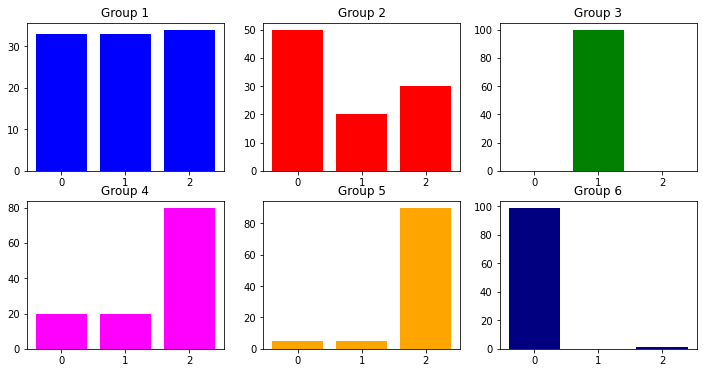

In [22]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
axes[0,0].bar(np.arange(3), group_1, color="blue")
axes[0,0].set_title("Group 1")
axes[0,1].bar(np.arange(3), group_2, color="red")
axes[0,1].set_title("Group 2")
axes[0,2].bar(np.arange(3), group_3, color="green")
axes[0,2].set_title("Group 3")
axes[1,0].bar(np.arange(3), group_4, color="magenta")
axes[1,0].set_title("Group 4")
axes[1,1].bar(np.arange(3), group_5, color="orange")
axes[1,1].set_title("Group 5")
axes[1,2].bar(np.arange(3), group_6, color="navy")
axes[1,2].set_title("Group 6")
plt.show()

In [23]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)
gini_4 = gini(group_4)
gini_5 = gini(group_5)
gini_6 = gini(group_6)

print(f"Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup_3: {gini_3:.3f}\nGroup 4: {gini_4:.3f}\nGroup 5: {gini_5:.3f}\nGroup_6: {gini_6:.3f}")

Group 1: 0.667
Group 2: 0.620
Group_3: 0.000
Group 4: 0.500
Group 5: 0.185
Group_6: 0.020


- 데이터의 구성이 균일할수록 지니 지수 값이 작아진다.
- 완전히 균일한 그룹의 경우 지니 지수의 값이 0이다.
- 불순도가 높을수록 1에 가까워진다.